In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from gpmap.simulate import MountFujiSimulation
from gpmap.simulate.mask import mask
from epistasis.models import EpistasisLinearRegression

from gpseer import GPSeer


from dask.distributed import Client

In [2]:
client = Client()

In [14]:
# Create an instance of the model. Using `from_length` makes this easy.
sim = MountFujiSimulation.from_length(3, field_strength=-1)

# add roughness, sampling from a range of values.
sim.set_roughness(range=(-1,1))
sim.set_stdeviations(0.5)

f, gpm = mask(sim, 0.5)

# Fit with epistasis model
model = EpistasisLinearRegression(order=1, model_type='local')

# Initialize a seer.
bins = np.arange(-1,10, .1)
seer = GPSeer(gpm, model, client=client, bins=bins, genotypes='complete', single_reference=True, db_path='database')

# Sample posterior.
seer.run_pipeline()

NameError: name 'gom' is not defined

In [16]:
model.add_gpm(gpm)
model.fit()
model.score()

0.68099453182277192

In [17]:
ml = seer.ml_results
ml

,DPF,DPT,DWF,DWT,TPF,TPT,TWF,TWT
max_likelihood,1.87391,2.387475,1.465563,1.979128,1.465563,1.979128,1.057216,1.570781


In [18]:
sim.df

,genotypes,phenotypes,stdeviations,n_replicates
0,TWF,0.727066,0.5,1
1,TWT,1.900931,0.5,1
2,TPF,0.293973,0.5,1
3,TPT,1.110735,0.5,1
4,DWF,1.677979,0.5,1
5,DWT,1.939849,0.5,1
6,DPF,2.204059,0.5,1
7,DPT,2.057325,0.5,1


,NAH,NAS,NKH,NKS,WAH,WAS,WKH,WKS
max_likelihood,2.046635,2.27811,0.105483,0.336959,1.762418,1.993893,-0.178734,0.052742


In [20]:
seer.sample_pipeline(n_samples=10)

In [21]:
r = seer.results

In [ ]:
gpm.

,RHI,RHM,RPI,RPM,VHI,VHM,VPI,VPM
max_likelihood,3.79547,2.85056,4.288057,3.343147,1.156082,0.211172,1.64867,0.70376
-1.0,3.79547,2.85056,4.288057,3.343147,1.156082,0.211172,1.64867,0.70376
-0.9,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.8,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.7000000000000001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.6000000000000001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.5000000000000001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.40000000000000013,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.30000000000000016,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.20000000000000018,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000


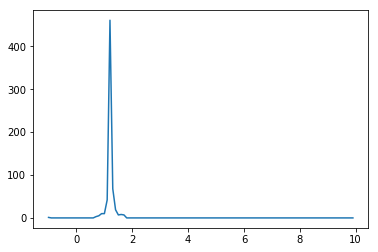

In [28]:
x = r.index[1:]
y = r.iloc[:,-4][1:]

plt.plot(x,y)

In [24]:
r

,RHI,RHM,RPI,RPM,VHI,VHM,VPI,VPM
max_likelihood,3.79547,2.85056,4.288057,3.343147,1.156082,0.211172,1.64867,0.70376
-1.0,3.79547,2.85056,4.288057,3.343147,1.156082,0.211172,1.64867,0.70376
-0.9,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.8,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.7000000000000001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.6000000000000001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.5000000000000001,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.40000000000000013,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.30000000000000016,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
-0.20000000000000018,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000
